In [1]:
import pandas as pd
import nltk

In [2]:
meg=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [3]:
meg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [5]:
ps=PorterStemmer()

In [6]:
corpus=[]

In [7]:
for i in range (len(meg)):
    review=re.sub('(^a-zA-Z)','',meg['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [10]:
meg['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [8]:
corpus

['go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...',
 'ok lar... joke wif u oni...',
 "free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'",
 'u dun say earli hor... u c alreadi say...',
 'nah think goe usf, live around though',
 "freemsg hey darl 3 week' word back! i'd like fun still? tb ok! xxx std chg send, £1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'mell mell (oru minnaminungint nurungu vettam)' set callertun callers. press *9 copi friend callertun",
 'winner!! valu network custom select receivea £900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobil 11 month more? u r entitl updat latest colour mobil camera free! call mobil updat co free 08002986030',
 "i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.",
 'six chanc win cash! 100 20,000 pound txt> csh11 send 87

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer(max_features=7000 )

In [18]:
x=cv.fit_transform(corpus).toarray()
x.shape

(5572, 7000)

In [26]:
y=pd.get_dummies(meg['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nn=MultinomialNB()
nn.fit(x_train,y_train)

MultinomialNB()

In [35]:
pred=nn.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix

<AxesSubplot: >

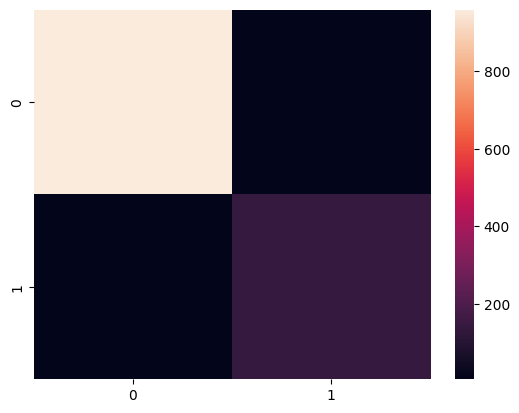

In [44]:
sns.heatmap(confusion_matrix(y_test,pred))

In [43]:
import seaborn as sns

In [48]:
from gensim.models import word2vect

ImportError: cannot import name 'word2vect' from 'gensim.models' (C:\Users\pavan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gensim\models\__init__.py)